In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the data
LoanData = pd.read_csv('data/01Exercise1.csv')
LoanData.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [3]:
LoanData.shape

(614, 6)

In [4]:
LoanPrep = LoanData.copy()
LoanPrep.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [5]:
#Identify the missing values 
LoanPrep.isnull().sum(axis=0)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [6]:
LoanPrep = LoanPrep.dropna()
LoanPrep.shape

(529, 6)

In [7]:
LoanPrep.isnull().sum(axis=0)

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [8]:
#Drop clomun gender
LoanPrep.drop(['gender'],axis=1,inplace=True)
LoanPrep.head()

,married,ch,income,loanamt,status
1,Yes,1.0,4583,128.0,N
2,Yes,1.0,3000,66.0,Y
3,Yes,1.0,2583,120.0,Y
4,No,1.0,6000,141.0,Y
5,Yes,1.0,5417,267.0,Y


In [9]:
#Create dummy variables
LoanPrep.dtypes

married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [10]:
LoanPrep = pd.get_dummies(LoanPrep,drop_first=True)

In [11]:
LoanPrep.head()

,ch,income,loanamt,married_Yes,status_Y
1,1.0,4583,128.0,True,False
2,1.0,3000,66.0,True,True
3,1.0,2583,120.0,True,True
4,1.0,6000,141.0,False,True
5,1.0,5417,267.0,True,True


In [12]:
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()

In [13]:
LoanPrep['income']=scalar_.fit_transform(LoanPrep[['income']])
LoanPrep['loanamt']=scalar_.fit_transform(LoanPrep[['loanamt']])
LoanPrep.head()

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,True,False
2,1.0,-0.392077,-0.971015,True,True
3,1.0,-0.461621,-0.294478,True,True
4,1.0,0.108246,-0.031380,False,True
5,1.0,0.011017,1.547205,True,True


In [14]:
#split data to train and test
y = LoanPrep['status_Y']
X = LoanPrep.drop(['status_Y'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234,stratify=y)
print(f"X_train:{X_train.shape} X_test:{X_test.shape}")

X_train:(354, 4) X_test:(175, 4)


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_predict = lr.predict(X_test)
y_predict[:5]

array([ True,  True,  True,  True, False])

In [21]:
y_test.head()

74      True
424     True
261     True
13     False
494    False
Name: status_Y, dtype: bool

In [22]:
#build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [23]:
cm = confusion_matrix(y_test,y_predict)

In [24]:
cm

array([[ 31,  23],
       [  2, 119]], dtype=int64)

In [25]:
lr.score(X_test,y_test)

0.8571428571428571

In [26]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])


## Get the probabilities of the prediction

In [44]:
y_prob = lr.predict_proba(X_test)[:,1]

In [56]:
#Create predictions based on probabilities
y_new_pred = []
threshhold=0.78

In [57]:
for i in range(0,len(y_prob)):
    if y_prob[i] > threshhold:
        y_new_pred.append(True)
    else:
        y_new_pred.append(False)

In [58]:
cm2 = confusion_matrix(y_test,y_new_pred)
cm2

array([[48,  6],
       [49, 72]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score, classification_report
score2 = accuracy_score(y_test,y_new_pred)
score2

0.6857142857142857

In [60]:
cr = classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

       False       0.94      0.57      0.71        54
        True       0.84      0.98      0.90       121

    accuracy                           0.86       175
   macro avg       0.89      0.78      0.81       175
weighted avg       0.87      0.86      0.85       175



In [61]:
cm

array([[ 31,  23],
       [  2, 119]], dtype=int64)

In [63]:
cr = classification_report(y_test,y_new_pred)
print(cr)

              precision    recall  f1-score   support

       False       0.49      0.89      0.64        54
        True       0.92      0.60      0.72       121

    accuracy                           0.69       175
   macro avg       0.71      0.74      0.68       175
weighted avg       0.79      0.69      0.70       175



## Get the AUC and plot the curve

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

In [67]:
fpr, tpr, threshold = roc_curve(y_test,y_prob)

In [68]:
AUC = roc_auc_score(y_test,y_prob)

In [69]:
import matplotlib.pyplot as plt

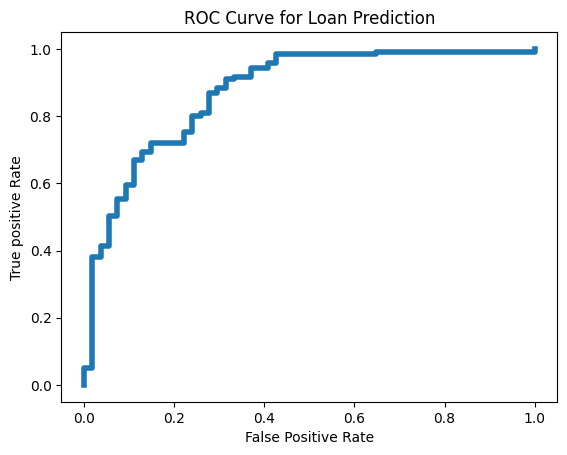

In [70]:
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve for Loan Prediction")
plt.show()

In [71]:
AUC

0.8719008264462811